# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

**Import numpy and pandas**

In [167]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [168]:
import matplotlib.pyplot  as plt

**Read in the csv file as a dataframe called df**

In [169]:
df = pd.read_csv("911.csv")


**Check the info() of the df**

In [170]:
print(df.info)

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWE

**Check the head of df**

In [171]:
print(df.head(1))
print(df.dtypes)

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:40:00  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  
lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [172]:
print(df["zip"].value_counts().index[0:5])

Float64Index([19401.0, 19464.0, 19403.0, 19446.0, 19406.0], dtype='float64')


**What are the top 5 townships (twp) for 911 calls?**

In [173]:
print(df["twp"].value_counts().index[:5])

Index(['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION', 'CHELTENHAM'], dtype='object')


**Take a look at the 'title' column, how many unique title codes are there?**

In [174]:
print(df["title"].nunique())

110


## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [175]:
def f(x):
    if x.startswith("EMS"  ):
        return "EMS"
    elif x.startswith("Fire"):
        return "Fire"
    elif x.startswith("Traffic"):
        return "Traffic"
df["Reason"] =  df["title"].apply(lambda x : f(x))

**What is the most common Reason for a 911 call based off of this new column?**

In [176]:
print(df["Reason"].value_counts().index[0])

EMS


**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

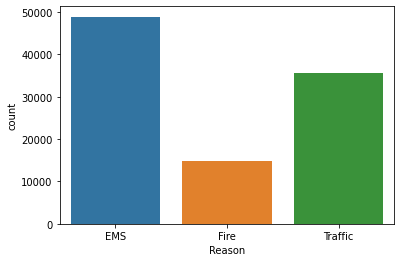

In [177]:
import seaborn as sns
sns.countplot(x = df["Reason"])

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [178]:
print(df["timeStamp"].dtypes)

object


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [179]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [180]:
print(df["timeStamp"].dtypes)

datetime64[ns]


You can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [181]:
df["Hour"] = df["timeStamp"].dt.hour

Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [182]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of week"] = df["timeStamp"].dt.day.map(dmap)


In [183]:
df["Month"] = df["timeStamp"].dt.month
print(df["Month"].unique())

[12  1  2  3  4  5  6  7  8]


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<AxesSubplot:xlabel='Day of week', ylabel='count'>

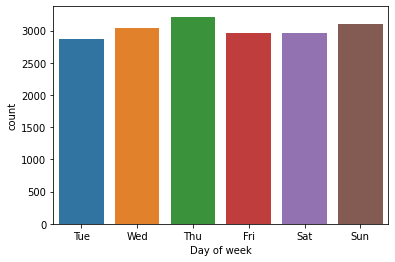

In [184]:
sns.countplot(x= df["Day of week"] , data = df["Reason"])

**Now do the same for Month:**

<AxesSubplot:xlabel='Reason', ylabel='count'>

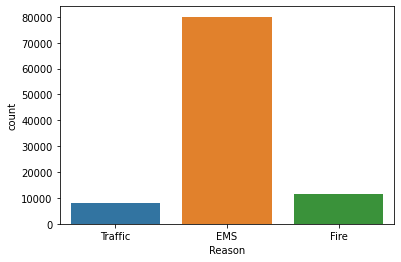

In [185]:
sns.countplot(x = df["Month"] , data = df["Reason"])

**Did you notice something strange about the Plot?**

_____

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

**Now create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [228]:
dd= df.groupby("Month")[["Reason"]].count()
print(dd)


       Reason
Month        
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
12          1


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

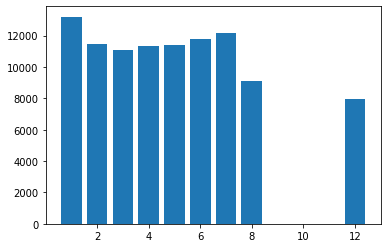

In [221]:
plt.bar(df.index , df["Reason"])
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

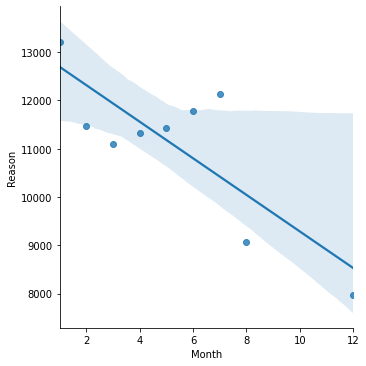

In [222]:
df.reset_index(inplace = True)
sns.lmplot(x = "Month",y = "Reason" ,data = df )

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [225]:
df=df.groupby["Date"].counts()
plt.figure(figsize = (12,10))
plt.bar(df.index,df)
plt.show()

TypeError: 'method' object is not subscriptable

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<AxesSubplot:xlabel='Date', ylabel='count'>

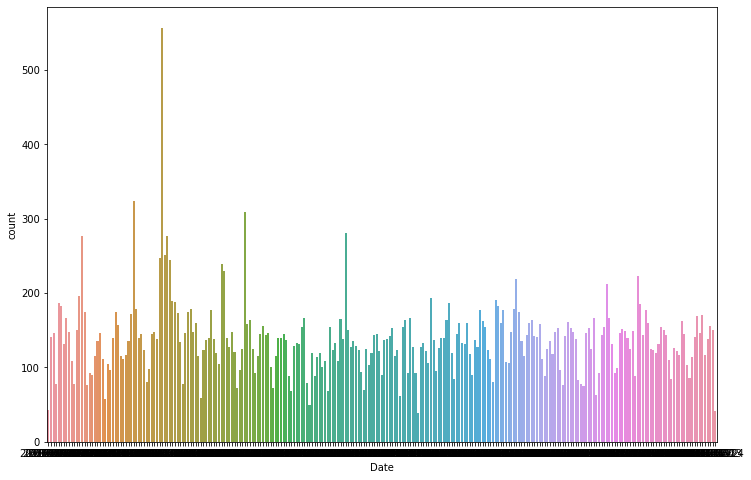

In [213]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["Date"][df["Reason"] == "Traffic"] , data = df)

<AxesSubplot:xlabel='Date', ylabel='count'>

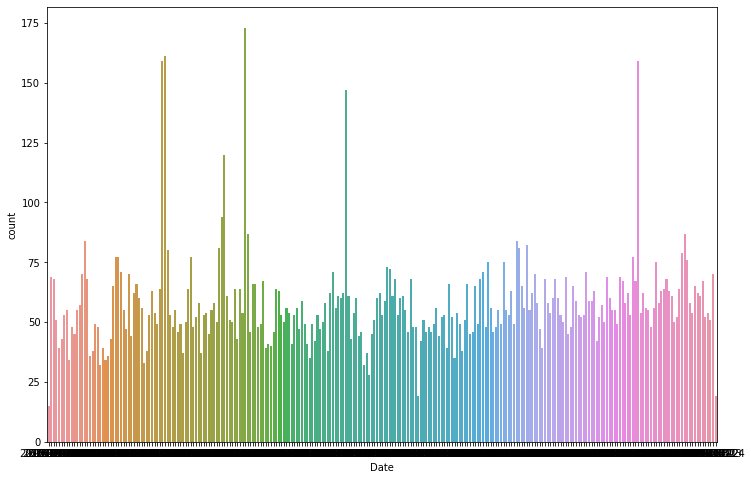

In [214]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["Date"][df["Reason"] == "Fire"] , data = df)

<AxesSubplot:xlabel='Date', ylabel='count'>

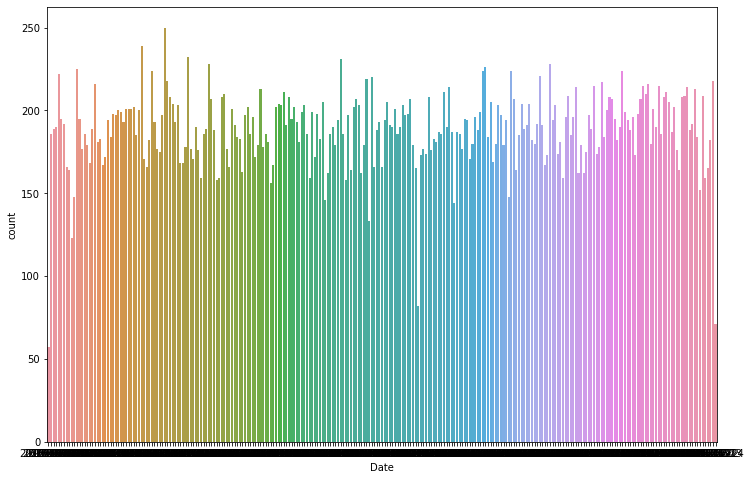

In [215]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["Date"][df["Reason"] == "EMS"] , data = df)

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:ylabel='Day of week'>

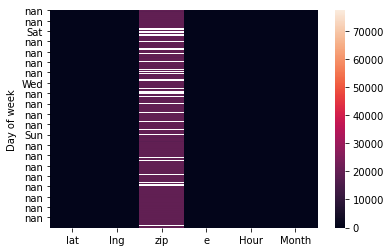